# CCM Final DataAnalysis

## Content
    1. Load data and preprocessing
    2. Compare error and RT between reference types
    3. Visualize target vs. response orientation distributions
    4. Sort error in terms of reference types

In [9]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
import seaborn as sns

In [23]:
pwd = os.getcwd()
data_dir = os.path.abspath(os.path.join(pwd, 'SubjectData/data_beh.csv'))
data = pd.read_csv(data_dir,sep=',')

print(data.head())

   subjID  run  trial  phase  oriRef  oriJitt  oriFinal  oriRespInit  \
0       1    1      1      9       2       -9        36           63   
1       1    1      2      3       1       -9       171           85   
2       1    1      3      4       2       -1        44           58   
3       1    1      4      1       3        6        96           12   
4       1    1      5      3       4        3       138           43   

   oriRespFinal  error  points        rt  outoftime  iti  
0            62    -26      48  2.609021        NaN  0.2  
1           165      6      88  3.047162        NaN  0.2  
2            53     -9      82  2.500657        NaN  0.2  
3            99     -3      94  3.697208        NaN  0.2  
4           143     -5      90  3.665645        NaN  0.2  


In [33]:
# define ori reference
oriRefs = [0, 45, 90, 135]
# centralize oriFinal and oriResp relative to ori
for i in range(len(data)):
    data.loc[i, 'oriFinal_centralized'] = data.loc[i, 'oriFinal'] - oriRefs[data.loc[i, 'oriRef']-1]
    data.loc[i, 'oriRespFinal_centralized'] = data.loc[i, 'oriRespFinal'] - oriRefs[data.loc[i, 'oriRef']-1]
    if data.loc[i, 'oriFinal_centralized'] > 90:
        data.loc[i, 'oriFinal_centralized'] = data.loc[i, 'oriFinal_centralized'] - 180
    if data.loc[i, 'oriRespFinal_centralized'] > 90:
        data.loc[i, 'oriRespFinal_centralized'] = data.loc[i, 'oriRespFinal_centralized'] - 180

In [34]:
# calculate absolute error
data['absError'] = abs(data['error'])

# decide if resp is bias toward or away from oriRef
for i in range(len(data)):
    # find oriRef
    oriRef_i = oriRefs[data.loc[i, 'oriRef']-1]
    if data.loc[i, 'oriRef']==1 and data.loc[i, 'oriJitt']<0:
        oriRef_i = 180
    # find oriFinal
    oriFinal_i = data.loc[i, 'oriFinal']
    # find oriResp
    oriResp_i = data.loc[i, 'oriRespFinal']
    # decide if resp is in the same direction as oriRef
    if (oriRef_i-oriFinal_i)*(oriResp_i-oriFinal_i)>0:
        data.loc[i, 'bias'] = 1
    else:
        data.loc[i, 'bias'] = -1

# calculate signed error
data['signError'] = data['absError']*data['bias']

print(data.head())

   subjID  run  trial  phase  oriRef  oriJitt  oriFinal  oriRespInit  \
0       1    1      1      9       2       -9        36           63   
1       1    1      2      3       1       -9       171           85   
2       1    1      3      4       2       -1        44           58   
3       1    1      4      1       3        6        96           12   
4       1    1      5      3       4        3       138           43   

   oriRespFinal  error  points        rt  outoftime  iti  \
0            62    -26      48  2.609021        NaN  0.2   
1           165      6      88  3.047162        NaN  0.2   
2            53     -9      82  2.500657        NaN  0.2   
3            99     -3      94  3.697208        NaN  0.2   
4           143     -5      90  3.665645        NaN  0.2   

   oriFinal_centralized  oriRespFinal_centralized  absError  bias  signError  
0                  -9.0                      17.0        26   1.0       26.0  
1                  -9.0                     -15.

In [49]:
# calculate absolute error
data['absError'] = abs(data['error'])

# decide if resp is bias toward or away from oriRef
for i in range(len(data)):
    # use centralized data
    # find oriFinal
    oriFinal_i = data.loc[i, 'oriFinal_centralized']
    # find oriResp
    oriResp_i = data.loc[i, 'oriRespFinal_centralized']
    # decide if resp is in the same direction as oriRef
    if (0-oriFinal_i)*(oriResp_i-oriFinal_i)>0:
        data.loc[i, 'bias'] = 1
    else:
        data.loc[i, 'bias'] = -1

# calculate signed error
data['signError'] = data['absError']*data['bias']

print(data.head())

   subjID  run  trial  phase  oriRef  oriJitt  oriFinal  oriRespInit  \
0       1    1      1      9       2       -9        36           63   
1       1    1      2      3       1       -9       171           85   
2       1    1      3      4       2       -1        44           58   
3       1    1      4      1       3        6        96           12   
4       1    1      5      3       4        3       138           43   

   oriRespFinal  error  points        rt  outoftime  iti  \
0            62    -26      48  2.609021        NaN  0.2   
1           165      6      88  3.047162        NaN  0.2   
2            53     -9      82  2.500657        NaN  0.2   
3            99     -3      94  3.697208        NaN  0.2   
4           143     -5      90  3.665645        NaN  0.2   

   oriFinal_centralized  oriRespFinal_centralized  absError  bias  signError  
0                  -9.0                      17.0        26   1.0       26.0  
1                  -9.0                     -15.

[Text(0, 0, '0deg'),
 Text(1, 0, '45deg'),
 Text(2, 0, '90deg'),
 Text(3, 0, '135deg')]

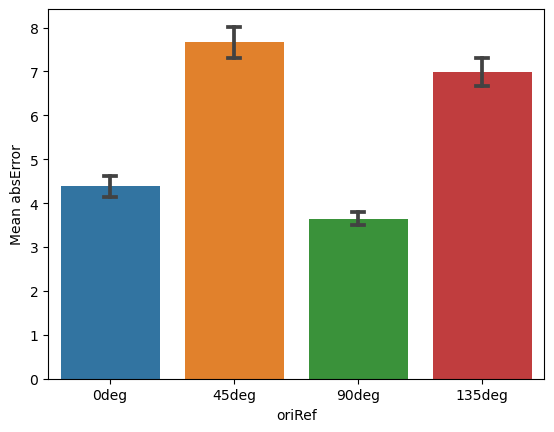

In [31]:
# plot errors
# plot resulst across ROIs 
ax = plt.subplot()

# draw bar plot
sns.barplot(data, x='oriRef', y='absError', hue='oriRef', estimator='mean', errorbar='se', capsize=0.1, dodge=False, ax=ax)
# draw individual points
# sns.stripplot(data, x='oriRef', y='absError', hue='subjID', palette='flare', dodge=False, alpha=0.6, size=12, ax=ax)
# remove legend
plt.legend([], [], frameon=False)

# set axis labels and title
ax.set_ylabel('Mean absError')
ax.set_xticklabels(['0deg', '45deg', '90deg', '135deg'])
# ax.set_ylim(0.0, 1.0)

[Text(0, 0, '0deg'),
 Text(1, 0, '45deg'),
 Text(2, 0, '90deg'),
 Text(3, 0, '135deg')]

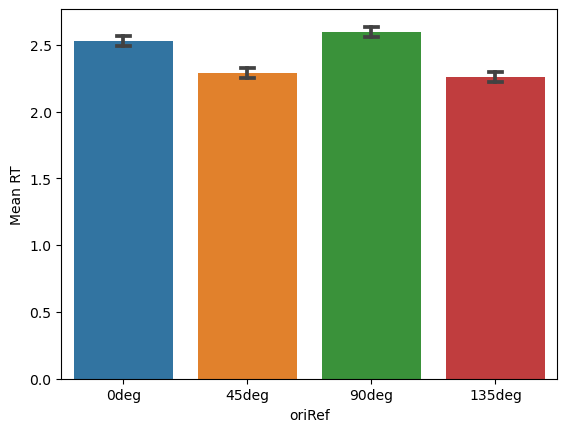

In [21]:
# plot rt
# plot resulst across ROIs 
ax = plt.subplot()

# draw bar plot
sns.barplot(data, x='oriRef', y='rt', hue='oriRef', estimator='mean', errorbar='se', capsize=0.1, dodge=False, ax=ax)
# draw individual points
# sns.stripplot(data, x='oriRef', y='absError', hue='subjID', palette='flare', dodge=False, alpha=0.6, size=12, ax=ax)
# remove legend
plt.legend([], [], frameon=False)

# set axis labels and title
ax.set_ylabel('Mean RT')
ax.set_xticklabels(['0deg', '45deg', '90deg', '135deg'])
# ax.set_ylim(0.0, 1.0)

In [51]:
data_refs = {}
data_refs['0'] = data[data['oriRef']==1 ]
data_refs['45'] = data[data['oriRef']==2 ]
data_refs['90'] = data[data['oriRef']==3 ]
data_refs['135'] = data[data['oriRef']==4 ]

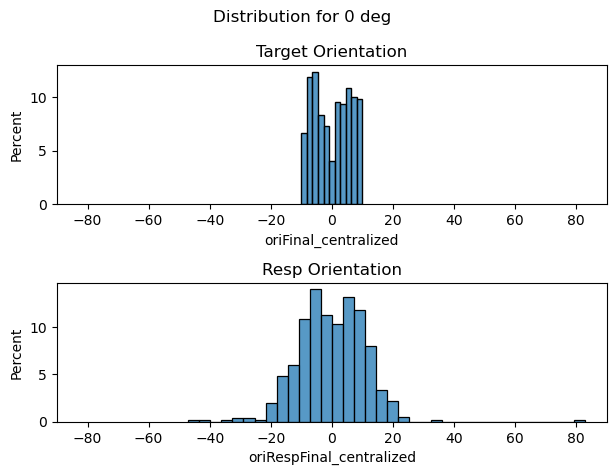

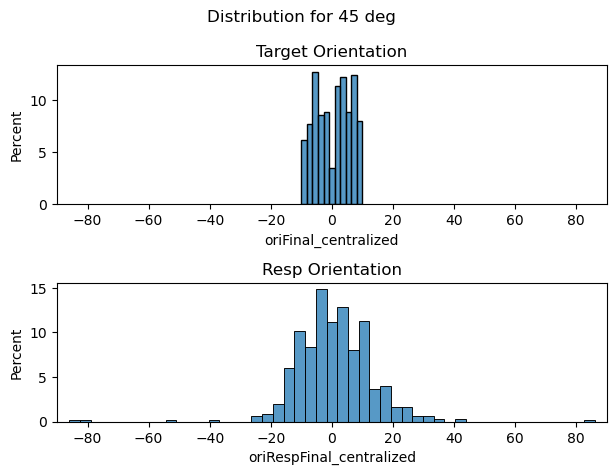

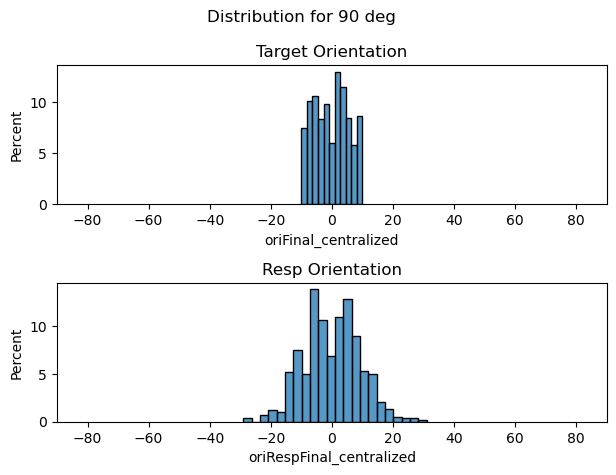

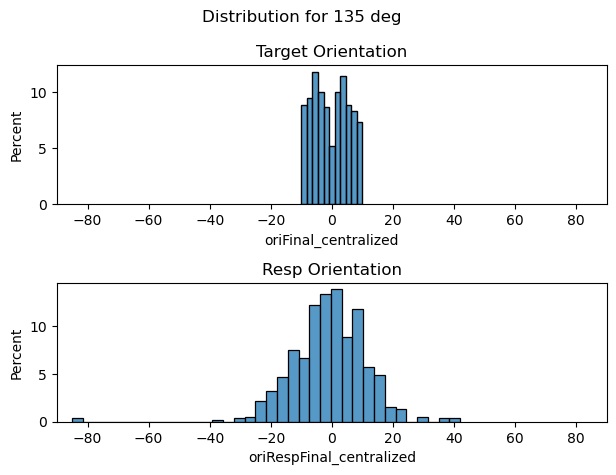

In [55]:
for i in range(4):
    data_i = data_refs[str(oriRefs[i])]
    # plot oriFinal and oriResp distribution centralized at oriRef
    fig, axs = plt.subplots(2, 1)
    fig.suptitle('Distribution for ' + str(oriRefs[i]) + ' deg')

    # Plot the target location histogram
    sns.histplot(data_i, x='oriFinal_centralized', ax=axs[0], stat="percent")
    axs[0].set_title('Target Orientation')
    axs[0].set_xlim(-90, 90)

    # plot the resp histogram
    sns.histplot(data_i, x='oriRespFinal_centralized', ax=axs[1], stat="percent")
    axs[1].set_title('Resp Orientation')
    axs[1].set_xlim(-90, 90)

    plt.tight_layout()

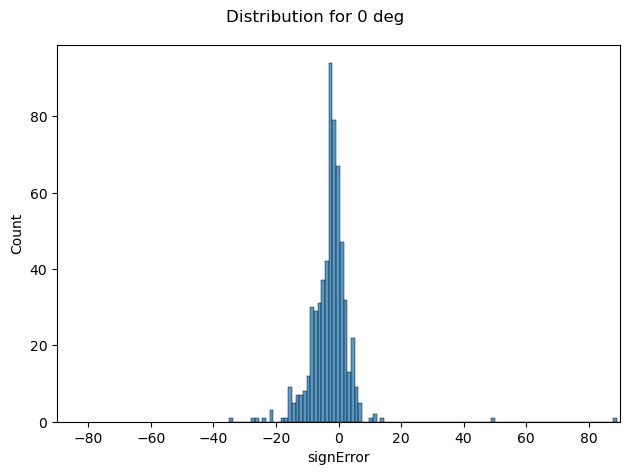

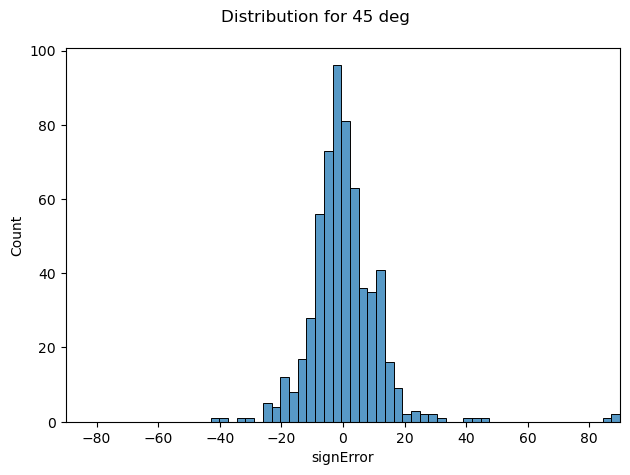

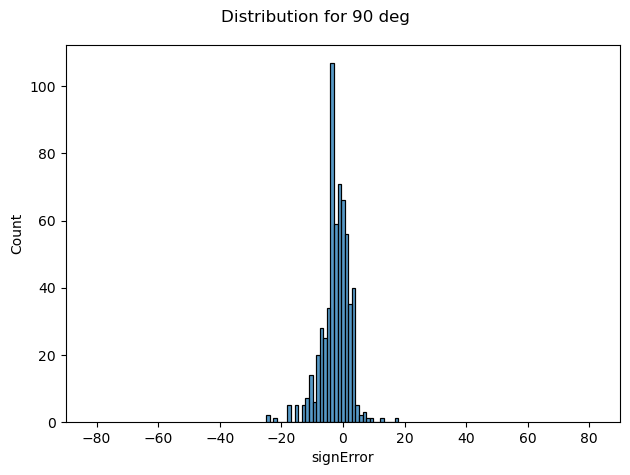

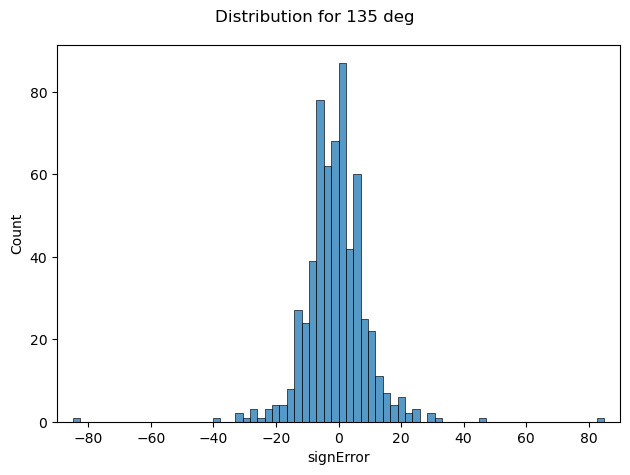

In [54]:
# plot signError distribution
for i in range(4):
    data_i = data_refs[str(oriRefs[i])]

    fig, axs = plt.subplots(1)
    fig.suptitle('Distribution for ' + str(oriRefs[i]) + ' deg')

    # Plot the signError histogram
    sns.histplot(data_i, x='signError')
    axs.set_xlim(-90, 90)
    plt.tight_layout()

In [7]:
# delete out of time trials
flag = data['outoftime']!=1
print(sum(flag))
data_clean = data[flag]
data_clean

2319


,subjID,run,trial,phase,oriRef,oriJitt,oriFinal,oriRespInit,oriRespFinal,error,points,rt,outoftime,iti
0,1,1,1,9,2,-9,36,63,62,-26,48,2.609021,NaN,0.2
1,1,1,2,3,1,-9,171,85,165,6,88,3.047162,NaN,0.2
2,1,1,3,4,2,-1,44,58,53,-9,82,2.500657,NaN,0.2
3,1,1,4,1,3,6,96,12,99,-3,94,3.697208,NaN,0.2
4,1,1,5,3,4,3,138,43,143,-5,90,3.665645,NaN,0.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2394,15,1,155,7,3,-1,89,93,88,1,98,2.375790,NaN,0.2
2395,15,1,156,1,3,0,90,18,91,-1,98,2.757365,NaN,0.2
2397,15,1,158,5,4,1,136,149,127,9,82,2.387765,NaN,0.2
2398,15,1,159,2,2,-6,39,20,46,-7,86,1.181797,NaN,0.2
